In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

## Check the unique values of columns which are of type object

In [8]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col,data[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


## we see that over18 col has only one value, hence we can drop that column

In [9]:
data.drop('Over18',inplace=True,axis=1)

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
new_data = pd.get_dummies(data,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [12]:
new_data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

## pd.get_dummies returns one col for ech categorical value, we need only n-1 cols for n cat values, hence we can delete redundant columns

In [13]:
new_data.drop(['BusinessTravel_Non-Travel','Department_Human Resources','EducationField_Human Resources','Gender_Female',
               'JobRole_Healthcare Representative','MaritalStatus_Divorced','OverTime_No'],axis=1,inplace=True)

In [14]:
new_data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing 

In [15]:
new_data['Attrition'].replace({"Yes":1,"No":0},inplace=True)
new_data['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [16]:
new_data.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0


In [17]:
Attrition = new_data.pop('Attrition')
new_data['Attrition'] = Attrition

In [18]:
new_data.head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,0,0


In [19]:
X = new_data.iloc[:,:47]
y = new_data.iloc[:,47]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1176, 47) (294, 47) (1176,) (294,)


## Logistic Regression

In [22]:
clf = LogisticRegression(random_state=0,C=100,max_iter=11000)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(metrics.f1_score(y_test, ypred,average='weighted')*100,"%")

87.69623233908949 %


In [23]:
scores = cross_val_score(clf, X, y, cv=5,scoring="f1_weighted")
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

[88.4973601  86.67223615 86.80776014 86.40562191 88.45449032]
mean f1_weighted score:  87.36749372365558 %
std dev:  0.9143349281458152 %


In [24]:
C = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
class_weight = ['dict', 'balanced', 'none']
dual = [True,False]
fit_intercept = [True,False]
penalty = ['l1', 'l2', 'elasticnet', 'none']
l1_ratio = [0,0.2,0.4,0.6,0.8,1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [11000]
random_grid = {'C': C,
               'class_weight': class_weight,
               'fit_intercept':fit_intercept,
               'solver':solver,
               'dual': dual,
               'penalty': penalty,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter
              }
print(random_grid)

{'C': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'class_weight': ['dict', 'balanced', 'none'], 'fit_intercept': [True, False], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'dual': [True, False], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1], 'max_iter': [11000]}


In [25]:
clf = LogisticRegression(random_state=0)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, n_jobs = -1)
clf_random.fit(X_train, y_train)
clf_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 379 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1751 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2409 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 13.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


{'solver': 'lbfgs',
 'penalty': 'l2',
 'max_iter': 11000,
 'l1_ratio': 0.6,
 'fit_intercept': False,
 'dual': False,
 'class_weight': 'none',
 'C': 40}

In [24]:
clf = LogisticRegression(random_state=0,C=40,max_iter=11000,solver='lbfgs',penalty='l2',fit_intercept=False,
                        dual=False,class_weight='none')
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(metrics.f1_score(y_test, ypred,average='weighted')*100,"%")

scores = cross_val_score(clf, X, y, cv=5)
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

87.79256253170486 %
[89.45578231 88.43537415 88.43537415 86.39455782 88.7755102 ]
mean f1_weighted score:  88.29931972789116 %
std dev:  1.0226732230185662 %


## Random Forest

In [25]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=100,random_state=100,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.8503401360544217 f1_score: 0.7931652569179222
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
           1       1.00      0.08      0.15        24

    accuracy                           0.85       147
   macro avg       0.92      0.54      0.54       147
weighted avg       0.87      0.85      0.79       147

Confusion matrix 
 [[123   0]
 [ 22   2]]



2 of KFold 10
score: 0.8571428571428571 f1_score: 0.8072052791153915
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
           1       1.00      0.12      0.22        24

    accuracy                           0.86       147
   macro avg       0.93      0.56      0.57       147
weighted avg       0.88      0.86      0.81       147

Confusion matrix 
 [[123   0]
 [ 21   3]]



3 of KFold 10
score: 0.8503401360544217 f1_score: 0.7931652569179222
              precision    recall  f1-score   sup

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [27]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=400,random_state=100,min_samples_split=2,min_samples_leaf=1,
                                 max_features='sqrt',max_depth=None,bootstrap=False,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.8571428571428571 f1_score: 0.8225894061782693
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       123
           1       0.71      0.21      0.32        24

    accuracy                           0.86       147
   macro avg       0.79      0.60      0.62       147
weighted avg       0.84      0.86      0.82       147

Confusion matrix 
 [[121   2]
 [ 19   5]]



2 of KFold 10
score: 0.8571428571428571 f1_score: 0.8072052791153915
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
           1       1.00      0.12      0.22        24

    accuracy                           0.86       147
   macro avg       0.93      0.56      0.57       147
weighted avg       0.88      0.86      0.81       147

Confusion matrix 
 [[123   0]
 [ 21   3]]



3 of KFold 10
score: 0.8435374149659864 f1_score: 0.7888438771263812
              precision    recall  f1-score   sup

## XGBoost 

In [28]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1score = metrics.f1_score(y_test,y_pred,average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1 weighted: %.2f%%" % (f1score * 100.0) )
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 88.44%
f1 weighted: 86.90%
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.62      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294



In [29]:
scores = cross_val_score(model, X, y, cv=5,scoring='f1_weighted')
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

[83.94856532 83.96456862 85.0225452  84.33287825 83.15111759]
mean f1_weighted score:  84.08393499649854 %
std dev:  0.6075662033526865 %


## Perform chisq and Annova tests to find the feature variables that affect the predictor variable the most.

In [31]:
test_data = new_data.copy()

In [32]:
for col in test_data.columns:
    if(test_data[col].dtypes == "uint8"):
        test_data[col] = test_data[col].astype('category')

In [33]:
test_data['Attrition'] = test_data['Attrition'].astype('category')

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   DailyRate                          1470 non-null   int64   
 2   DistanceFromHome                   1470 non-null   int64   
 3   Education                          1470 non-null   int64   
 4   EmployeeCount                      1470 non-null   int64   
 5   EmployeeNumber                     1470 non-null   int64   
 6   EnvironmentSatisfaction            1470 non-null   int64   
 7   HourlyRate                         1470 non-null   int64   
 8   JobInvolvement                     1470 non-null   int64   
 9   JobLevel                           1470 non-null   int64   
 10  JobSatisfaction                    1470 non-null   int64   
 11  MonthlyIncome                      1470 non

In [35]:
print(test_data['JobRole_Manager'].dtypes)

category


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
int_cols = []
for col in test_data.columns:
    if test_data[col].dtypes == 'int64':
        lm = ols(col+' ~ Attrition',data=test_data).fit()
        table = sm.stats.anova_lm(lm)
        if table['PR(>F)'][0] > 0.05:
            int_cols.append(col)
            print("col: "+col+" does not affect Attrition")

col: Education does not affect Attrition
col: EmployeeNumber does not affect Attrition
col: HourlyRate does not affect Attrition
col: MonthlyRate does not affect Attrition
col: NumCompaniesWorked does not affect Attrition
col: PercentSalaryHike does not affect Attrition
col: PerformanceRating does not affect Attrition
col: RelationshipSatisfaction does not affect Attrition
col: YearsSinceLastPromotion does not affect Attrition


In [37]:
test_data['Attrition'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [38]:
from scipy.stats import chi2_contingency
cat_cols = []
for col in test_data.columns:
    if test_data[col].dtype.name == 'category':
        data_crosstab = pd.crosstab(test_data[col], test_data['Attrition'], margins = False)
        g,p,dof,expctd = chi2_contingency(data_crosstab)
        if p > 0.05:
            cat_cols.append(col)
            print("col: "+col+" does not affect Attrition") 

col: BusinessTravel_Travel_Rarely does not affect Attrition
col: EducationField_Life Sciences does not affect Attrition
col: EducationField_Medical does not affect Attrition
col: EducationField_Other does not affect Attrition
col: Gender_Male does not affect Attrition
col: JobRole_Human Resources does not affect Attrition
col: JobRole_Research Scientist does not affect Attrition
col: JobRole_Sales Executive does not affect Attrition


In [39]:
int_cols+cat_cols

['Education',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'YearsSinceLastPromotion',
 'BusinessTravel_Travel_Rarely',
 'EducationField_Life Sciences',
 'EducationField_Medical',
 'EducationField_Other',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive']

In [40]:
del test_data

In [41]:
new_data.head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,0,0


## Drop the columns which do not have any effect on Attrition

In [42]:
new_data.drop(int_cols+cat_cols,axis=1,inplace=True)

In [43]:
new_data.head(5)

,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,...,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1102,1,1,2,3,2,4,5993,80,...,0,0,0,0,0,0,0,1,1,1
1,49,279,8,1,3,2,2,2,5130,80,...,0,0,0,0,0,0,1,0,0,0
2,37,1373,2,1,4,2,1,3,2090,80,...,0,1,0,0,0,0,0,1,1,1
3,33,1392,3,1,4,3,1,3,2909,80,...,0,0,0,0,0,0,1,0,1,0
4,27,591,2,1,1,3,1,2,3468,80,...,0,1,0,0,0,0,1,0,0,0


In [44]:
new_data.shape

(1470, 31)

In [45]:
X = new_data.iloc[:,:30]
y = new_data.iloc[:,30]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [48]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1176, 30) (294, 30) (1176,) (294,)


## Logistic Regression

In [49]:
clf = LogisticRegression(random_state=0,C=40,max_iter=11000,solver='lbfgs',penalty='l2',fit_intercept=False,
                        dual=False,class_weight='none')
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(metrics.f1_score(y_test, ypred,average='weighted')*100,"%")

scores = cross_val_score(clf, X, y, cv=5)
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

87.11905220815176 %
[87.41496599 88.0952381  86.39455782 86.05442177 88.7755102 ]
mean f1_weighted score:  87.34693877551021 %
std dev:  1.0181380644282845 %


## Random Forest

In [50]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=400,random_state=100,min_samples_split=2,min_samples_leaf=1,
                                 max_features='sqrt',max_depth=None,bootstrap=False,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.8639455782312925 f1_score: 0.8340863062782364
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       123
           1       0.75      0.25      0.38        24

    accuracy                           0.86       147
   macro avg       0.81      0.62      0.65       147
weighted avg       0.85      0.86      0.83       147

Confusion matrix 
 [[121   2]
 [ 18   6]]



2 of KFold 10
score: 0.8367346938775511 f1_score: 0.8075168528950042
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       123
           1       0.50      0.21      0.29        24

    accuracy                           0.84       147
   macro avg       0.68      0.58      0.60       147
weighted avg       0.80      0.84      0.81       147

Confusion matrix 
 [[118   5]
 [ 19   5]]



3 of KFold 10
score: 0.8571428571428571 f1_score: 0.8225894061782693
              precision    recall  f1-score   sup

## XGBoost

In [51]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1score = metrics.f1_score(y_test,y_pred,average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1 weighted: %.2f%%" % (f1score * 100.0) )
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 86.73%
f1 weighted: 85.79%
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.50      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.70      0.65      0.67       294
weighted avg       0.85      0.87      0.86       294



In [52]:
scores = cross_val_score(model, X, y, cv=5,scoring='f1_weighted')
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

[83.66555925 83.93638982 86.23504908 83.73380121 85.43817628]
mean f1_weighted score:  84.60179512786334 %
std dev:  1.0430500641306848 %


## Check the distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EA0EE7E08>,
      dtype=object)

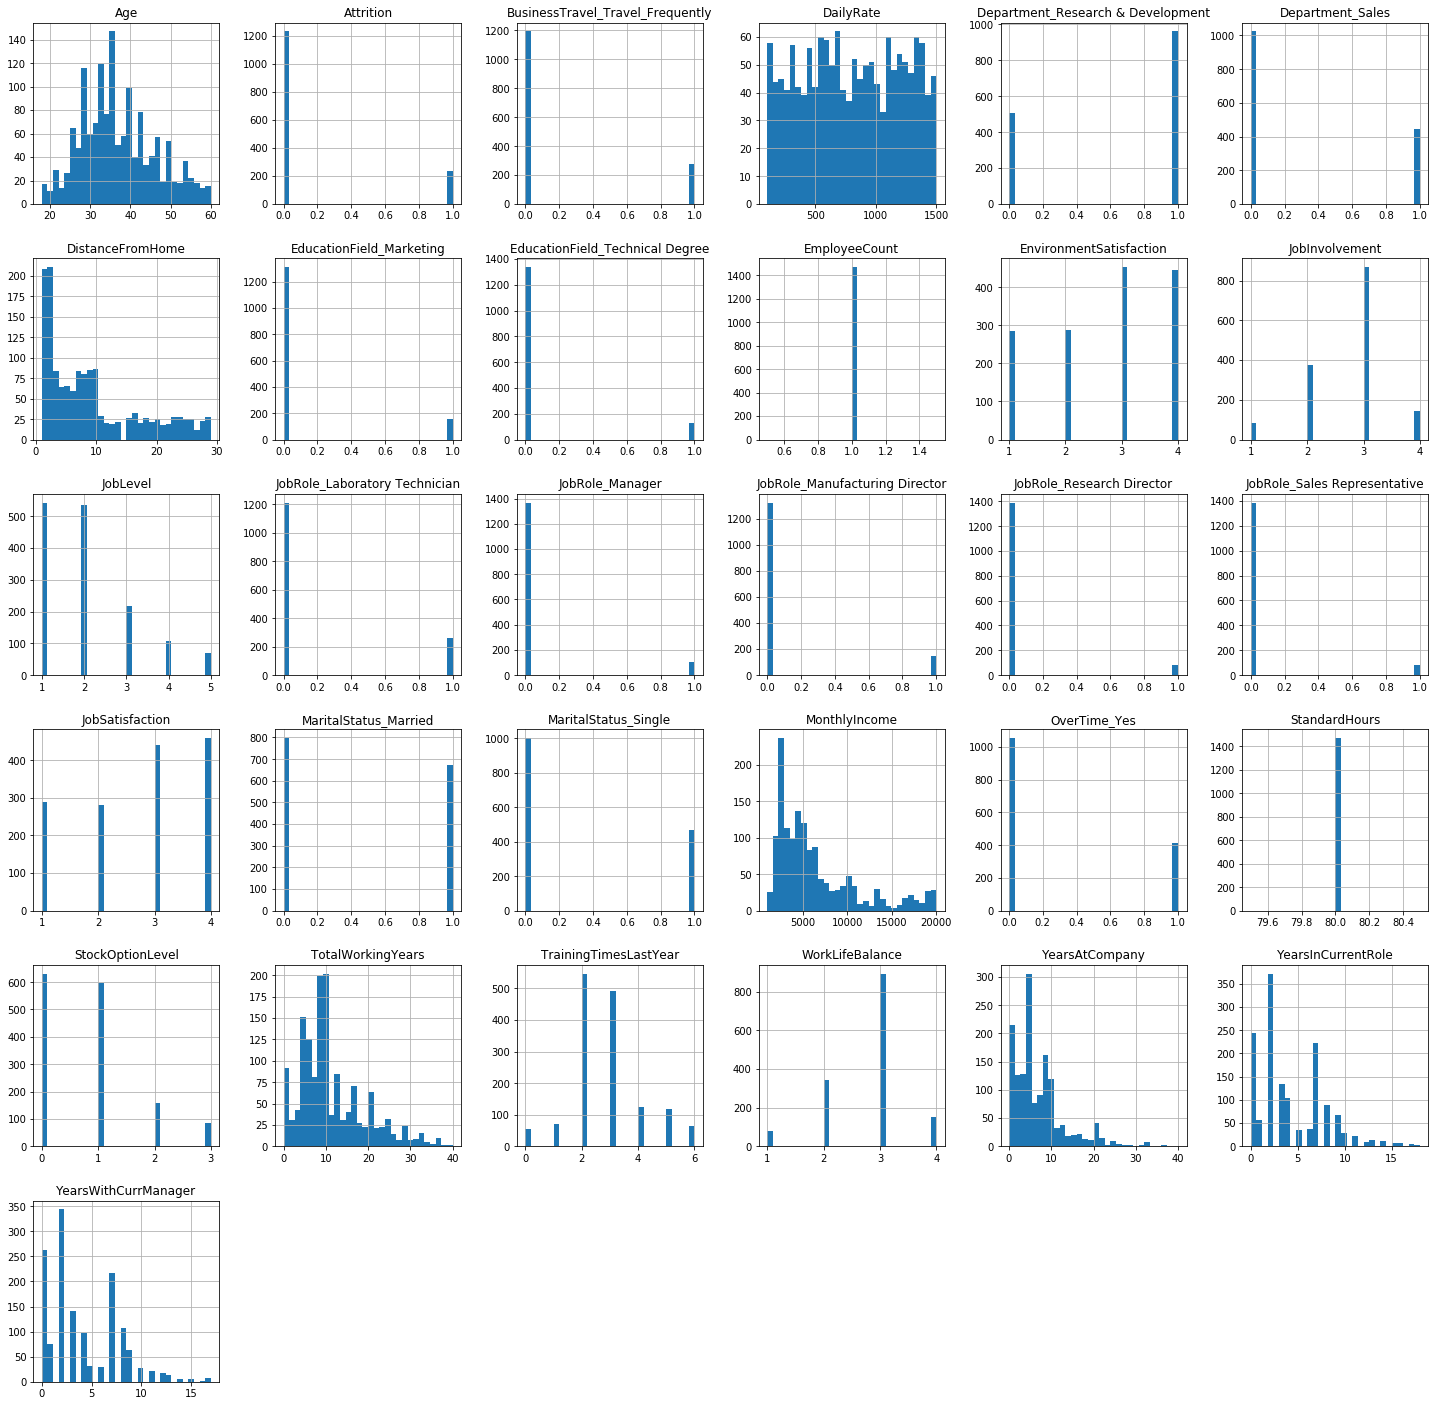

In [53]:
new_data.hist(bins=30, figsize=(25, 25))

In [54]:
new_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'Attrition'],
      dtype='object')

## Check for outliers

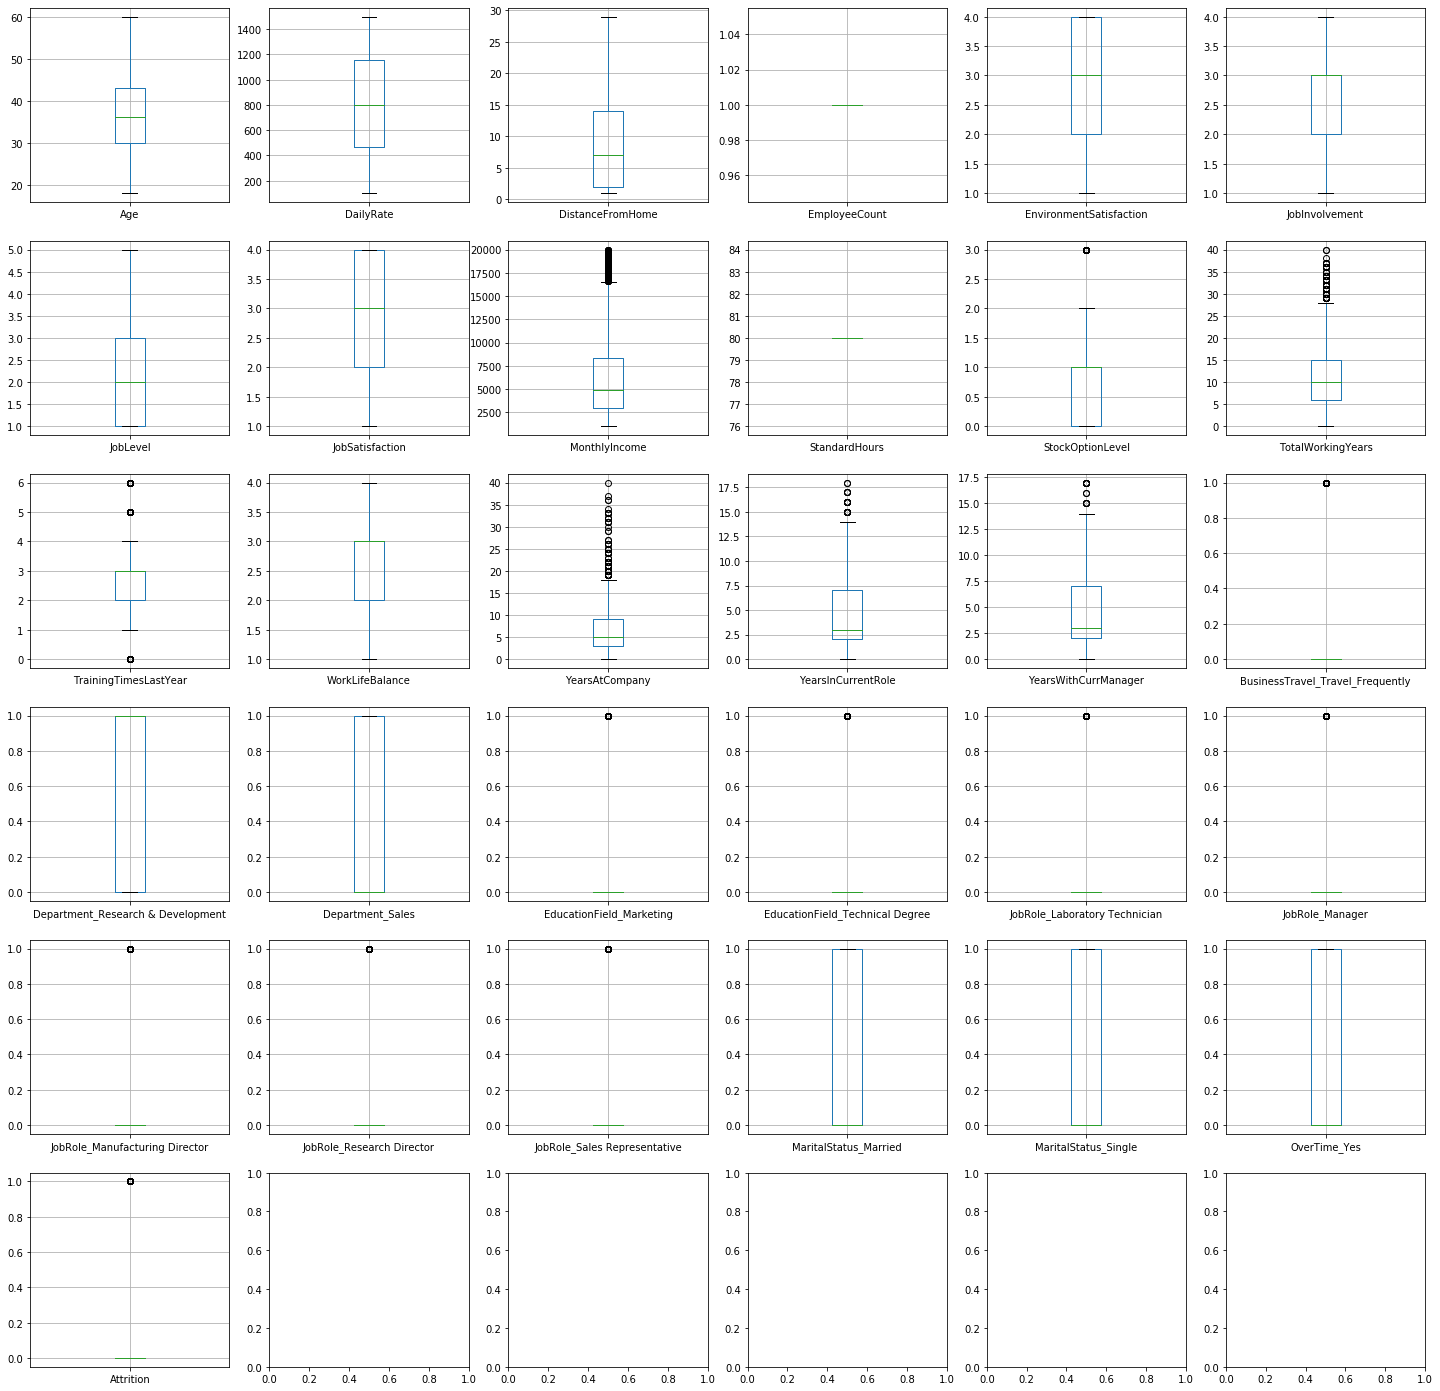

In [55]:
fig, axes = plt.subplots(nrows=6, ncols=6,figsize=(25,25)) # create 2x2 array of subplots
rows=0
cols=0
num = 0
for col in new_data.columns:
    num=num+1
    if num == 32:
        break
    new_data.boxplot(column=col, ax=axes[rows,cols]) # add boxplot to 1st subplot
    if cols == 5:
        cols=0
        rows=rows+1
    elif cols < 5:
        cols=cols+1
plt.show()

## Scale Data

In [56]:
#we see that many columns have outliers , hence we will use robust scaler to scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(new_data)

In [57]:
scaled_data = pd.DataFrame(scaled_data,columns=new_data.columns)

In [58]:
scaled_data.head(5)

,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,...,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,0.384615,0.433526,-0.500000,0.0,-0.5,0.0,0.0,0.5,0.196416,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.000000,-0.755780,0.083333,0.0,0.0,-1.0,0.0,-0.5,0.038588,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.076923,0.825145,-0.416667,0.0,0.5,-1.0,-0.5,0.0,-0.517374,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,-0.230769,0.852601,-0.333333,0.0,0.5,0.0,-0.5,0.0,-0.367593,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.692308,-0.304913,-0.416667,0.0,-1.0,0.0,-0.5,-0.5,-0.265362,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
X = scaled_data.iloc[:,:30]
y = scaled_data.iloc[:,30]

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [61]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1176, 30) (294, 30) (1176,) (294,)


## Logistic Regression

In [62]:
clf = LogisticRegression(random_state=0,C=40,max_iter=11000,solver='lbfgs',penalty='l2',fit_intercept=False,
                        dual=False,class_weight='none')
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(clf.score(X_test, y_test))

scores = cross_val_score(clf, X, y, cv=5)
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

0.8503401360544217
[79.93197279 82.31292517 86.05442177 82.31292517 84.01360544]
mean f1_weighted score:  82.92517006802723 %
std dev:  2.0340022296225913 %


## RandomForest

In [63]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=400,random_state=100,min_samples_split=2,min_samples_leaf=1,
                                 max_features='sqrt',max_depth=None,bootstrap=False,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0.0,1.0]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.8639455782312925 f1_score: 0.8340863062782364
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       123
         1.0       0.75      0.25      0.38        24

    accuracy                           0.86       147
   macro avg       0.81      0.62      0.65       147
weighted avg       0.85      0.86      0.83       147

Confusion matrix 
 [[121   2]
 [ 18   6]]



2 of KFold 10
score: 0.8367346938775511 f1_score: 0.8075168528950042
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       123
         1.0       0.50      0.21      0.29        24

    accuracy                           0.84       147
   macro avg       0.68      0.58      0.60       147
weighted avg       0.80      0.84      0.81       147

Confusion matrix 
 [[118   5]
 [ 19   5]]



3 of KFold 10
score: 0.8503401360544217 f1_score: 0.810544217687075
              precision    recall  f1-score   supp

## XGBoost Classifier

In [64]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1score = metrics.f1_score(y_test,y_pred,average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1 weighted: %.2f%%" % (f1score * 100.0) )
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 86.73%
f1 weighted: 85.79%
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.50      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.70      0.65      0.67       294
weighted avg       0.85      0.87      0.86       294



In [65]:
scores = cross_val_score(model, X, y, cv=5,scoring='f1_weighted')
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

[83.66555925 83.93638982 86.23504908 83.73380121 85.43817628]
mean f1_weighted score:  84.60179512786334 %
std dev:  1.0430500641306848 %


## XGBoost Classifier gives us the best weighted score, hence we choose XGBoost model.